In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
remarks_supp_opp = pd.read_csv("prml20/remarks_supp_opp.csv")
tr = pd.read_csv("prml20/train.csv")
test = pd.read_csv("prml20/test.csv")
remarks = pd.read_csv("prml20/remarks.csv")
ratings = pd.read_csv("prml20/ratings.csv")

remarks=remarks.drop_duplicates()
remarks.dropna()

remarks_supp_opp=remarks_supp_opp.drop_duplicates()
remarks_supp_opp.dropna()

#ratings.head()

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,emp,comp,support,oppose,remarkId
0,307,bnivzbfi,True,False,fvwadfrj
1,36,bnivzbfi,True,False,fvwadfrj
2,276,bnivzbfi,True,False,fvwadfrj
3,24,bnivzbfi,True,False,fvwadfrj
4,382,bnivzbfi,True,False,xrrfkgap
...,...,...,...,...,...
336954,26,wsmblohy,True,False,gngdsitv
336955,-49,wsmblohy,True,False,gngdsitv
336956,232,wsmblohy,True,False,gngdsitv
336957,-25,wsmblohy,True,False,gngdsitv


In [3]:
##Company ratings
##Check whether ratings has all companies. It misses out one company, which is there in remarks_supp_opp, verified from the line below
print(set(remarks_supp_opp["comp"].unique()).issubset(set(ratings["comp"].unique())))
comp_list = np.unique(np.concatenate((ratings["comp"].unique(), remarks_supp_opp["comp"].unique())))

data = {"comp":comp_list}
comp_data = pd.DataFrame(data)
comp_data['TotNumEmployees'] = comp_data["comp"]
comp_data['AvgRating'] = comp_data["comp"]
comp_data['TotRating'] = comp_data["comp"]
comp_data['NumRating'] = comp_data["comp"]
comp_data['SuppOppMean']   = comp_data["comp"]
for i in range(len(comp_data['comp'])):
    Arr_emp_of_comp = ratings[ratings["comp"] == comp_list[i]]["emp"].append(tr[tr["comp"]==comp_list[i]]["emp"])
    Arr_emp_of_comp = Arr_emp_of_comp.append(remarks[remarks["comp"] == comp_list[i]]["emp"])
    Arr_emp_of_comp = Arr_emp_of_comp.append(remarks_supp_opp[remarks_supp_opp["comp"] == comp_list[i]]["emp"])
    comp_data['TotNumEmployees'].iloc[i] = Arr_emp_of_comp.unique().shape[0]
    comp_data['AvgRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]]["rating"].mean()
    comp_data['TotRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]]["rating"].sum()
    comp_data['NumRating'].iloc[i] = ratings[ratings["comp"] == comp_list[i]].shape[0]
    comp_data['SuppOppMean'].iloc[i]   = remarks_supp_opp[(remarks_supp_opp["comp"] == comp_list[i])]["support"].mean()
comp_data

False


,comp,TotNumEmployees,AvgRating,TotRating,NumRating,SuppOppMean
0,azalutpt,10,3.45652,159,46,NaN
1,bhqczwkj,265,3.08928,18063,5847,0.906019
2,bnivzbfi,356,3.23647,86595,26756,0.795631
3,bucyzegb,9,3.39623,180,53,0.727273
4,dmgwoqhz,48,3.47532,11545,3322,0.962144
5,ejeyobsm,101,2.84384,15206,5347,0.788495
6,ewpvmfbc,169,2.64353,9522,3602,0.876229
7,fjslutlg,9,3.66667,55,15,NaN
8,fqsozvpv,60,2.77778,175,63,0.960725
9,iqdwmigj,142,2.48749,10338,4156,0.845769


In [4]:
## Create Company wise Dataframes, to make things easy(quicker) to preprocess

#emp_list = ratings["emp"].unique()
#comp_list = ratings["comp"].unique()

comp_list = np.unique(np.concatenate((ratings["comp"].unique(), remarks_supp_opp["comp"].unique())))

df_comp_RatingOfEmp = {}
df_comp_RemarkOfEmp = {}
df_comp_SupOppOfEmp = {}
for i in comp_list:
    df_comp_RatingOfEmp[i] = ratings[ratings["comp"] == i]
    df_comp_RemarkOfEmp[i] = remarks[remarks["comp"] == i]
    df_comp_SupOppOfEmp[i] = remarks_supp_opp[remarks_supp_opp["comp"] == i]

df_comp_RatingOfEmp["phcvroct"]

,emp,comp,Date,rating
56689,47,phcvroct,12-02-2015,1
56690,3,phcvroct,21-02-2015,1
56691,20,phcvroct,24-02-2015,1
56692,54,phcvroct,24-02-2015,1
56693,66,phcvroct,24-02-2015,1
...,...,...,...,...
107163,956,phcvroct,20-03-2017,4
107164,64,phcvroct,20-03-2017,4
107165,79,phcvroct,20-03-2017,4
107166,162,phcvroct,20-03-2017,4


In [95]:
tr["lastratingdate"] = pd.to_datetime(tr["lastratingdate"])
ratings["Date"] = pd.to_datetime(ratings["Date"])
remarks["remarkDate"] = pd.to_datetime(remarks["remarkDate"])

tr_modified = copy.deepcopy(tr)
test_modified = copy.deepcopy(test)

tr_modified["cumm_rating"] = tr_modified["left"]
test_modified["cumm_rating"]= test_modified["emp"]
tr_modified["no_of_ratings"] = tr_modified["left"]
test_modified["no_of_ratings"]= test_modified["emp"]
tr_modified["supp_opp"] = tr_modified["left"]
test_modified["supp_opp"]= test_modified["emp"]
tr_modified["Numsupp_opp"] = tr_modified["left"]
test_modified["Numsupp_opp"]= test_modified["emp"]
tr_modified["year"] = pd.DatetimeIndex(tr["lastratingdate"]).year
test_modified["year"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"])).year
tr_modified["month"] = pd.DatetimeIndex(tr["lastratingdate"]).month
test_modified["month"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"])).month
tr_modified["day"] = pd.DatetimeIndex(tr["lastratingdate"]).day
test_modified["day"]= pd.DatetimeIndex(pd.to_datetime(test["lastratingdate"])).day

tr_modified["CompTNE"] = tr_modified["left"]
test_modified["CompTNE"]= test_modified["emp"]
tr_modified["CompAvgRating"] = tr_modified["left"]
test_modified["CompAvgRating"]= test_modified["emp"]
tr_modified["CompTotRating"] = tr_modified["left"]
test_modified["CompTotRating"]= test_modified["emp"]
tr_modified["CompNumRating"] = tr_modified["left"]
test_modified["CompNumRating"]= test_modified["emp"]
tr_modified["CompSuppOppMean"] = tr_modified["left"]
test_modified["CompSuppOppMean"]= test_modified["emp"]

In [96]:
import time
t1 = time.time()
for i in range(tr.shape[0]):
    emp = tr_modified["emp"].iloc[i]
    comp = tr_modified["comp"].iloc[i]
    last_date = tr_modified["lastratingdate"].iloc[i]
    #emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp) & (pd.to_datetime(df_comp_RatingOfEmp[comp]["Date"]) <= last_date)]
    emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp)]
    
    tr_modified["cumm_rating"].iloc[i] = emp_rating["rating"].mean()
    tr_modified["no_of_ratings"].iloc[i] = emp_rating.shape[0]
    tr_modified["supp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].mean()
    tr_modified["Numsupp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].shape[0]
    
    tr_modified["CompTNE"].iloc[i] = float(comp_data["TotNumEmployees"].loc[comp_data["comp"]==comp])
    tr_modified["CompAvgRating"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompTotRating"].iloc[i] = float(comp_data["TotRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompNumRating"].iloc[i] = float(comp_data["NumRating"].loc[comp_data["comp"]==comp])
    tr_modified["CompSuppOppMean"].iloc[i] = float(comp_data["SuppOppMean"].loc[comp_data["comp"]==comp])
t2 = time.time()
print(t2-t1)

42.65772318840027


In [97]:
tr_modified.head()

,id,emp,comp,lastratingdate,left,cumm_rating,no_of_ratings,supp_opp,Numsupp_opp,year,month,day,CompTNE,CompAvgRating,CompTotRating,CompNumRating,CompSuppOppMean
0,2228,939,phcvroct,2016-10-17,1,3.000000,1,NaN,0,2016,10,17,789.0,2.591810,130832.0,50479.0,0.833465
1,4349,250,jblrepyr,2017-03-19,0,3.767857,112,0.889313,262,2017,3,19,171.0,3.028743,16649.0,5497.0,0.910327
2,945,134,ewpvmfbc,2016-09-21,0,2.923077,26,1.000000,32,2016,9,21,169.0,2.643531,9522.0,3602.0,0.876229
3,4553,164,wsmblohy,2017-03-17,0,2.411765,17,0.950000,20,2017,3,17,430.0,2.763706,10082.0,3648.0,0.775309
4,941,129,ewpvmfbc,2016-04-04,0,2.800000,5,0.875000,8,2016,4,4,169.0,2.643531,9522.0,3602.0,0.876229


In [98]:
import time
t1 = time.time()
for i in range(test.shape[0]):
    #if i%100 ==0:
    #    print(i)
    emp = test_modified["emp"].iloc[i]
    comp = test_modified["comp"].iloc[i]
    last_date = test_modified["lastratingdate"].iloc[i]
    emp_rating = df_comp_RatingOfEmp[comp][(df_comp_RatingOfEmp[comp]["emp"] == emp) & (df_comp_RatingOfEmp[comp]["Date"] <= last_date)]
    
    test_modified["cumm_rating"].iloc[i]= emp_rating["rating"].mean()  
    test_modified["no_of_ratings"].iloc[i] = emp_rating["rating"].shape[0]
    test_modified["supp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].mean()
    test_modified["Numsupp_opp"].iloc[i] = df_comp_SupOppOfEmp[comp][df_comp_SupOppOfEmp[comp]["emp"] == emp]["support"].shape[0]
    
    test_modified["CompTNE"].iloc[i] = float(comp_data["TotNumEmployees"].loc[comp_data["comp"]==comp])
    test_modified["CompAvgRating"].iloc[i] = float(comp_data["AvgRating"].loc[comp_data["comp"]==comp])
    test_modified["CompTotRating"].iloc[i] = float(comp_data["TotRating"].loc[comp_data["comp"]==comp])
    test_modified["CompNumRating"].iloc[i] = float(comp_data["NumRating"].loc[comp_data["comp"]==comp])
    test_modified["CompSuppOppMean"].iloc[i] = float(comp_data["SuppOppMean"].loc[comp_data["comp"]==comp])
    
t2 = time.time()
print(t2-t1)


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


11.837980031967163


In [99]:
tr_modified = tr_modified.fillna(0.8521361472764343)
test_modified = test_modified.fillna(0.8521361472764343)
tr_modified = tr_modified.drop(["id","emp","lastratingdate"],axis=1)
test_modified = test_modified.drop(["id","emp","lastratingdate"],axis=1)
Y_tr = tr_modified["left"]

In [100]:
map_comp = {}
for l in np.unique(tr_modified["comp"]):
    tot = tr_modified[tr_modified["comp"]==l].shape[0]
    yes_left = tr_modified[(tr_modified["comp"]==l)&(tr_modified["left"]==1)].shape[0]
    map_comp[l] = yes_left/tot
tr_modified = tr_modified.drop(["left"],axis=1)
tr_modified["comp"] = tr_modified["comp"].map(map_comp)
test_modified["comp"] = test_modified["comp"].map(map_comp)

In [101]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
cols = list(tr_modified.columns)
for col in cols:
    tr_modified[col] = tr_modified[col].astype(float)
    tr_modified[[col]] = scaler.fit_transform(tr_modified[[col]])

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
cols = list(test_modified.columns)
for col in cols:
    test_modified[col] = test_modified[col].astype(float)
    test_modified[[col]] = scaler.fit_transform(test_modified[[col]])
X_train = copy.deepcopy(tr_modified)
Y_train = copy.deepcopy(Y_tr)

Text(0, 0.5, 'sepal_width')

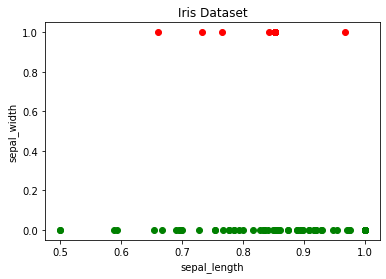

In [103]:
colors = {1:'r', 0:'g'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(100,200):
    ax.scatter(X_train["supp_opp"].iloc[i],Y_train[i],color=colors[Y_train[i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import svm, tree, linear_model, neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer


In [105]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [169]:
def evaluate(estimator, X_values, Y_truth):
    estimator.fit(X_values,Y_truth)
    weight_vec = 4*Y_truth+1
    return (np.sum((np.multiply(weight_vec, 1.*(Y_values==Y_truth))/np.sum(weight_vec))))

acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, Y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, Y_train, cv=kfold, scoring='roc_auc')
    #cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
    #    model, X_train, Y_train, cv=kfold, scoring=evaluate)

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,94.65,1.51,91.18,1.48
2,SVM,89.21,2.08,88.46,1.37
3,KNN,89.13,2.62,90.13,1.75
0,Logistic Regression,88.18,1.94,83.98,1.89
5,Gaussian NB,84.67,2.78,85.51,1.83
4,Decision Tree Classifier,81.99,3.12,89.17,2.11


In [167]:
def evaluate(Y_values, Y_truth):
    weight_vec = 4*Y_truth+1
    return (np.sum((np.multiply(weight_vec, 1.*(Y_values==Y_truth))/np.sum(weight_vec))))

size = Y_train.size
#indices = np.array(range(len(Y_train)))
#np.random.shuffle(indices)
#train_indices = indices[:int(0.8*len(Y_train))]
#validationn_indices = indices[int(0.8*len(Y_train)):]

X_tr = X_train[:int(0.9*size)]
Y_tr = Y_train[:int(0.9*size)]
X_validation = X_train[int(0.9*size):]
Y_validation = Y_train[int(0.9*size):]

rf = RandomForestClassifier(n_estimators=100,random_state=498)
rf.fit(X_tr,Y_tr)

names = X_train.columns
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))


pred = rf.predict(X_validation)
print(np.sum(pred==Y_validation)/len(pred))
print(evaluate(pred, Y_validation))

[(0.1528, 'comp'), (0.1253, 'Numsupp_opp'), (0.1082, 'day'), (0.1022, 'no_of_ratings'), (0.0922, 'cumm_rating'), (0.0877, 'month'), (0.0634, 'supp_opp'), (0.0626, 'CompTNE'), (0.0525, 'year'), (0.0461, 'CompTotRating'), (0.0438, 'CompNumRating'), (0.0326, 'CompSuppOppMean'), (0.0307, 'CompAvgRating')]
0.9121813031161473
0.8376068376068377
